Business Understanding

In [57]:
# objective 
""" 1. how often users from different cohorts use the cash advance services.(Frequency of service usage over the time - trend analysis - bar chart)
    2. Incident rate for payment-related issues across cohorts (trend variation to understand in which periods this appear and for each cohort)
    3. Revenue Analysis over the time: total revenue generated by each cohort over months to assess the financial impact of user behavior (trend)
    
    
4.New Metric to track this:

- how long time to happen the first incident rate / min and max 
- avg of users that need the cash advance
-measure of insights into user behavior or the performance of IronHack Payments' services.

Columns_to_use: 
    track the data of first request - [id,amount,created_at,updated_at,user_id,status]
    revenue analysis = transfer_type,cash_request_received_date,
    incident rate = [deleted_account_i, reimbursement_date (charge_date),recovery_status,reco_last_update]
"""

" 1. how often users from different cohorts use the cash advance services.(Frequency of service usage over the time - trend analysis - bar chart)\n    2. Incident rate for payment-related issues across cohorts (trend variation to understand in which periods this appear and for each cohort)\n    3. Revenue Analysis over the time: total revenue generated by each cohort over months to assess the financial impact of user behavior (trend)\n    \n    \n4.New Metric to track this:\n\n- how long time to happen the first incident rate / min and max \n- avg of users that need the cash advance\n-measure of insights into user behavior or the performance of IronHack Payments' services.\n\nColumns_to_use: \n    track the data of first request - [id,amount,created_at,updated_at,user_id,status]\n    revenue analysis = transfer_type,cash_request_received_date,\n    incident rate = [deleted_account_i, reimbursement_date (charge_date),recovery_status,reco_last_update]\n"

Data Colection

In [58]:
#Libraries used for this project 

import pandas as pd # painel data, dataframes
import numpy as np  # numerical data 
import os # manage directories folders
import seaborn as sns # visualization
from datetime import datetime # format dates

#dataset1
cash_req = pd.read_csv("extract - cash request - data analyst.csv")
df1 = cash_req.copy()
df1 = pd.DataFrame(df1)
df1

#dataset2
fee = pd.read_csv("extract - fees - data analyst - .csv")
df2 = fee.copy()
df2 = pd.DataFrame(df2)
df2.shape

(21061, 13)

Joining the Dataframes

In [59]:
# merging the dataframe 
merged_df = pd.merge(df1,df2,how='left',left_on='id',right_on='cash_request_id') # Isi remarks: should be a inner join # left join based on the id

# Improvemnts needed
#remove user id, request id
#rename suffix - name of columns on the marge
# freq count with the fees type
# use everything on a subset to use later - fees per cast request total fees per cash request # flag to business



Data Cleaning and Manipulation

In [60]:
merged_df2 = merged_df.copy()

In [ ]:
# checking the Data

merged_df.head()
merged_df2.info
merged_df2.columns
merged_df2 = merged_df.copy()
merged_df2.isnull().sum()

# Cleaning Duplicates, nulls and the empty spaces
merged_df2.isnull().sum()
merged_df2.duplicated().sum()
(merged_df2es  =='').sum() # no spaces on the dataframe
(merged_df2 =='').sum() # no space the dataframe


id_x                          0
amount                        0
status_x                      0
created_at_x                  0
updated_at_x                  0
user_id                       0
moderated_at                  0
deleted_account_id            0
reimbursement_date            0
cash_request_received_date    0
money_back_date               0
transfer_type                 0
send_at                       0
recovery_status               0
reco_creation                 0
reco_last_update              0
id_y                          0
cash_request_id               0
type                          0
status_y                      0
category                      0
total_amount                  0
reason                        0
created_at_y                  0
updated_at_y                  0
paid_at                       0
from_date                     0
to_date                       0
charge_moment                 0
dtype: int64

In [62]:
merged_df2

,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32089,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,...,accepted,NaN,5.0,Instant Payment Cash Request 22357,2020-10-20 07:58:19.637461+00,2020-10-20 07:58:19.637491+00,2021-02-05 12:19:30.685779+00,NaN,NaN,after
32090,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,...,accepted,NaN,5.0,Postpone Cash Request 20256,2020-10-30 17:08:16.906449+00,2020-10-30 17:08:21.967966+00,2020-10-30 17:08:21.416796+00,2020-11-06 11:00:00+00,2020-12-07 11:00:00+00,before
32091,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,...,accepted,NaN,5.0,Instant Payment Cash Request 20256,2020-10-10 05:42:11.679401+00,2020-10-13 14:25:03.460352+00,2021-02-05 13:14:19.731397+00,NaN,NaN,after
32092,19886,100.0,direct_debit_sent,2020-10-08 14:16:52.155661+00,2021-01-05 15:45:52.645536+00,44867.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-10,...,accepted,NaN,5.0,Postpone Cash Request 19886,2020-10-10 21:22:00.083739+00,2020-10-13 14:25:18.501716+00,2020-10-10 21:22:04.456828+00,2020-11-06 22:00:00+00,2020-12-06 11:00:00+00,before


In [73]:
subset_merged_df_approach2 = merged_df2[['user_id','created_at_x','status_x','status_y','recovery_status',
                                        'amount','cash_request_id','total_amount','reimbursement_date','type']]
subset_merged_df_approach2.loc[:, 'recovery_status'] = subset_merged_df_approach2['recovery_status'].fillna("Not Applicable")
subset_merged_df_approach2.isnull().sum()
subset_merged_df_approach2 = subset_merged_df_approach2.dropna(subset=['user_id','cash_request_id'])
subset_merged_df_approach2.isnull().sum()
subset_merged_df_approach2.dtypes



user_id               float64
created_at_x           object
status_x               object
status_y               object
recovery_status        object
amount                float64
cash_request_id       float64
total_amount          float64
reimbursement_date     object
type                   object
dtype: object

Data Analysis Exploration

In [74]:
subset_merged_df_approach2.dtypes

user_id               float64
created_at_x           object
status_x               object
status_y               object
recovery_status        object
amount                float64
cash_request_id       float64
total_amount          float64
reimbursement_date     object
type                   object
dtype: object

Converting dates

In [75]:
subset_merged_df_approach2.loc[:, 'created_at_x'] = subset_merged_df_approach2['created_at_x'].apply(lambda x: pd.to_datetime(x, errors='coerce'))
subset_merged_df_approach2.loc[:, 'reimbursement_date'] = subset_merged_df_approach2['reimbursement_date'].apply(lambda x: pd.to_datetime(x, errors='coerce'))
subset_merged_df_approach2.dtypes


user_id               float64
created_at_x           object
status_x               object
status_y               object
recovery_status        object
amount                float64
cash_request_id       float64
total_amount          float64
reimbursement_date     object
type                   object
dtype: object

In [66]:
subset_merged_df_approach2.dtypes

user_id               float64
created_at_x           object
status_x               object
status_y               object
recovery_status        object
amount                float64
cash_request_id       float64
total_amount          float64
reimbursement_date     object
type                   object
dtype: object

In [95]:
subset_merged_df_approach2.loc[:, 'created_at_x'] = subset_merged_df_approach2['created_at_x'].apply(lambda x: pd.to_datetime(x, errors='coerce'))
subset_merged_df_approach2.loc[:, 'reimbursement_date'] = subset_merged_df_approach2['reimbursement_date'].apply(lambda x: pd.to_datetime(x, errors='coerce'))
subset_merged_df_approach2.dtypes



user_id                           float64
created_at_x          datetime64[ns, UTC]
status_x                           object
status_y                           object
recovery_status                    object
amount                            float64
cash_request_id                   float64
total_amount                      float64
reimbursement_date    datetime64[ns, UTC]
type                               object
dtype: object

Data Exploration

In [86]:
# Descriptive statitics : Checking the measures of the data 
statitics_table = round(subset_merged_df_approach2.describe(),2).T
statitics_table

,count,mean,std,min,25%,50%,75%,max
user_id,20151.0,37988.60,27987.12,47.0,14868.0,31538.0,56357.5,103503.0
amount,20151.0,81.80,26.97,1.0,50.0,100.0,100.0,200.0
cash_request_id,20151.0,16514.39,6587.49,1456.0,11968.0,17403.0,21921.5,27010.0
total_amount,20151.0,5.00,0.00,5.0,5.0,5.0,5.0,5.0


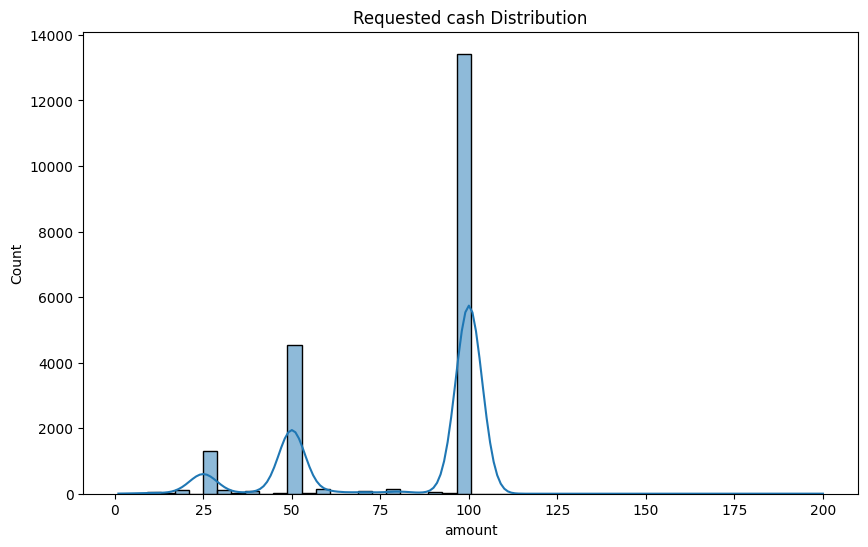

In [94]:
import matplotlib.pyplot as plt # review
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(subset_merged_df_approach2['amount'], kde=True, bins=50)
plt.title('Requested cash Distribution')
plt.show()

Cohort Analysis

In [96]:
subset_merged_df_approach2.dtypes


user_id                           float64
created_at_x          datetime64[ns, UTC]
status_x                           object
status_y                           object
recovery_status                    object
amount                            float64
cash_request_id                   float64
total_amount                      float64
reimbursement_date    datetime64[ns, UTC]
type                               object
dtype: object

In [98]:
subset_merged_df_approach2.loc[:, 'year'] = subset_merged_df_approach2['year_month'].dt.year # extracting the year and month
subset_merged_df_approach2.loc[:, 'month'] = subset_merged_df_approach2['year_month'].dt.month
subset_merged_df_approach2[['year_month', 'year', 'month']].head()



,year_month,year,month
48,2020-10,2020,10
88,2020-05,2020,5
141,2020-07,2020,7
142,2020-07,2020,7
143,2020-07,2020,7


In [103]:
subset_merged_df_approach2.isnull().sum()

user_id               0
created_at_x          0
status_x              0
status_y              0
recovery_status       0
amount                0
cash_request_id       0
total_amount          0
reimbursement_date    0
type                  0
year_month            0
year                  0
month                 0
dtype: int64

In [151]:
frequency_table = subset_merged_df_approach2[['year_month', 'year', 'month', 'user_id', 'status_y']].copy()
frequency_table['accepted_flag'] = frequency_table['status_y'].apply(lambda x: 1 if x == 'accepted' else 0)
frequency_table

,year_month,year,month,user_id,status_y,accepted_flag
0,2020-10,2020,10,21465.0,accepted,1
1,2020-05,2020,5,2109.0,accepted,1
2,2020-07,2020,7,23328.0,cancelled,0
3,2020-07,2020,7,23328.0,cancelled,0
4,2020-07,2020,7,23328.0,cancelled,0
...,...,...,...,...,...,...
20146,2020-10,2020,10,82122.0,accepted,1
20147,2020-10,2020,10,64517.0,accepted,1
20148,2020-10,2020,10,64517.0,accepted,1
20149,2020-10,2020,10,44867.0,accepted,1


In [ ]:
grouped_df = frequency_table.groupby(['year_month', 'year', 'month'])['accepted_flag'].sum().reset_index()
grouped_df = grouped_df.rename(columns={'accepted_flag': 'accepted_user_count'})
grouped_df


,year_month,year,month,accepted_user_count
0,2020-04,2020,4,0
1,2020-05,2020,5,98
2,2020-06,2020,6,843
3,2020-07,2020,7,942
4,2020-08,2020,8,2240
5,2020-09,2020,9,3263
6,2020-10,2020,10,6836
7,2020-11,2020,11,103


Empty DataFrame
Columns: [year_month, year, month, accepted_user_count, year_month_str]
Index: []


C:\Users\meite\AppData\Local\Temp\ipykernel_12752\3577010059.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year_month_str', y='accepted_user_count', data=grouped_df, palette='viridis')


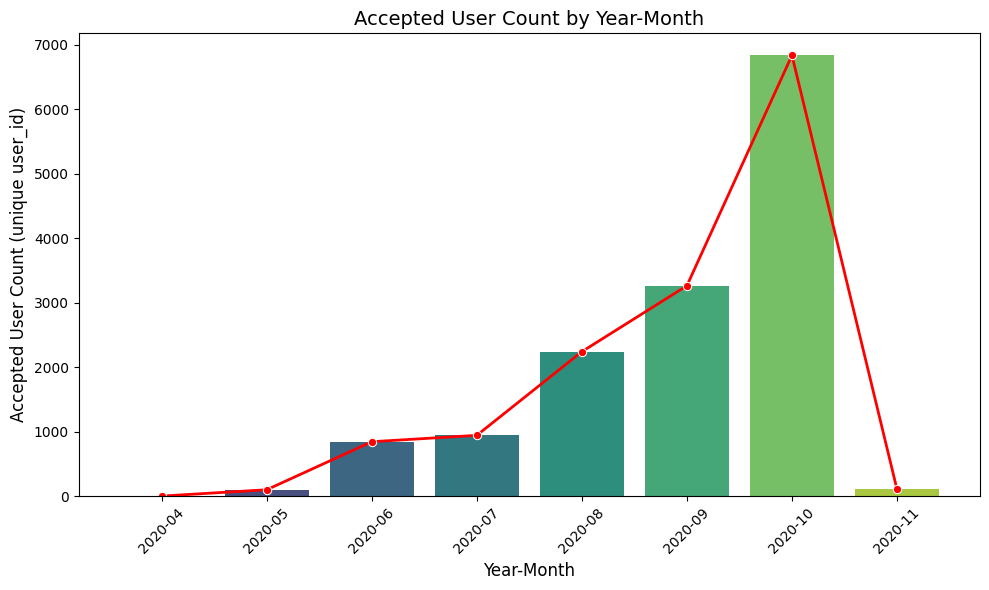

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns


grouped_df['year_month_str'] = grouped_df['year_month'].astype(str)
print(grouped_df[grouped_df['year_month_str'].str.startswith('2019')])

plt.figure(figsize=(10, 6))
sns.barplot(x='year_month_str', y='accepted_user_count', data=grouped_df, palette='viridis')
sns.lineplot(x='year_month_str', y='accepted_user_count', data=grouped_df, color='red', marker='o', linewidth=2)
plt.title('Accepted User Count by Year-Month', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Accepted User Count (unique user_id)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [184]:
import pandas as pd

subset_merged_df_approach2['incident_flag'] = subset_merged_df_approach2['type'].apply(lambda x: 1 if str(x).startswith('incident') else 0)
grouped_df_incident = subset_merged_df_approach2.groupby('year_month')['incident_flag'].sum().reset_index()
grouped_df_incident= grouped_df.rename(columns={'incident_flag': 'incident_count'})
grouped_df_incident






,year_month,incident_count
0,2020-04,0
1,2020-05,42
2,2020-06,501
3,2020-07,604
4,2020-08,467
5,2020-09,368
6,2020-10,48
7,2020-11,0


In [ ]:
subset_merged_df_approach2['incident_flag'] = subset_merged_df_approach2['type'].apply(lambda x: 1 if str(x).startswith('incident') else 0)
grouped_df_incident = subset_merged_df_approach2.groupby('year_month')['incident_flag'].sum().reset_index()
grouped_df_incident = grouped_df_incident.rename(columns={'incident_flag': 'incident_count'})

grouped_df_total = subset_merged_df_approach2.groupby('year_month')['type'].count().reset_index()
grouped_df_total = grouped_df_total.rename(columns={'type': 'total_count'})

grouped_df_incident = pd.merge(grouped_df_incident, grouped_df_total, on='year_month')

grouped_df_incident['incident_rate'] = round(grouped_df_incident['incident_count'] / grouped_df_incident['total_count'],2)

# Exibir o DataFrame final
grouped_df_incident


,year_month,incident_count,total_count,incident_rate
0,2020-04,0,1,0.00
1,2020-05,42,241,0.17
2,2020-06,501,1544,0.32
3,2020-07,604,1878,0.32
4,2020-08,467,3357,0.14
5,2020-09,368,4440,0.08
6,2020-10,48,8577,0.01
7,2020-11,0,113,0.00


C:\Users\meite\AppData\Local\Temp\ipykernel_12752\817313753.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='incident_count', y='year_month', data=grouped_df, palette='viridis')


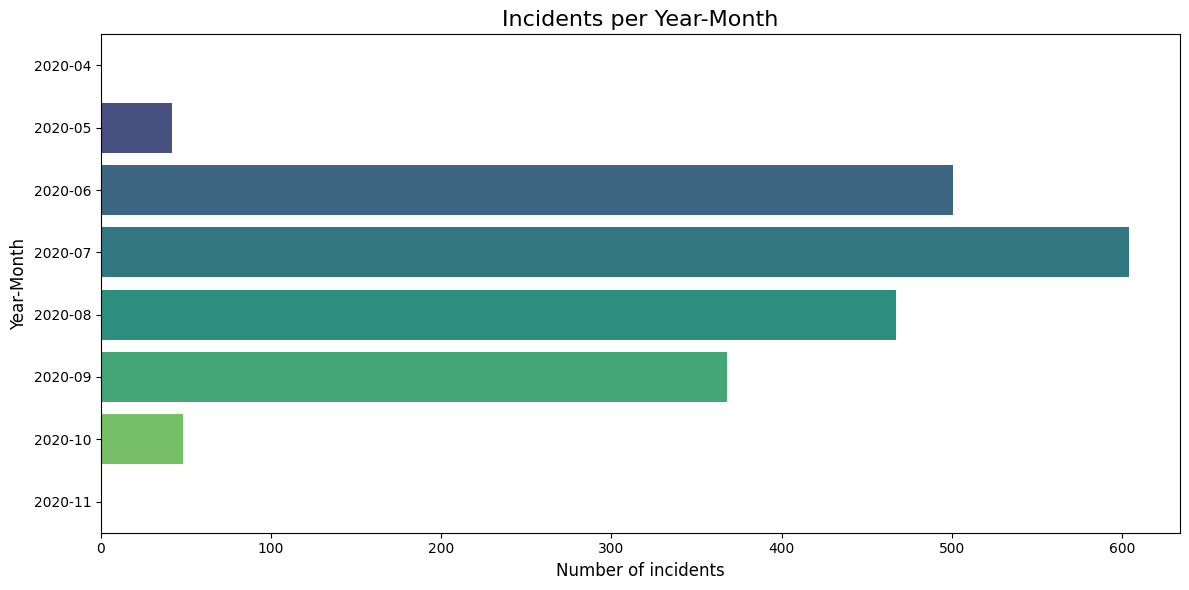

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(12, 6))
sns.barplot(x='incident_count', y='year_month', data=grouped_df, palette='viridis')
plt.title('Incidents per Year-Month', fontsize=16)
plt.xlabel('Number of incidents', fontsize=12)
plt.ylabel('Year-Month', fontsize=12)
plt.tight_layout()
plt.show()


In [202]:
subset_merged_df_approach2

,user_id,created_at_x,status_x,status_y,recovery_status,amount,cash_request_id,total_amount,reimbursement_date,type,year_month,year,month,accepted_user_count,incident_flag
0,21465.0,2020-10-23 15:20:26.163927+00:00,money_back,accepted,Not Applicable,25.0,23534.0,5.0,2020-11-10 23:51:00+00:00,instant_payment,2020-10,2020,10,NaN,0
1,2109.0,2020-05-27 02:26:27.615190+00:00,money_back,accepted,Not Applicable,100.0,2203.0,5.0,2020-07-15 02:26:27+00:00,postpone,2020-05,2020,5,NaN,0
2,23328.0,2020-07-01 09:30:03.145410+00:00,active,cancelled,pending,100.0,6098.0,5.0,2020-08-03 22:00:00+00:00,postpone,2020-07,2020,7,NaN,0
3,23328.0,2020-07-01 09:30:03.145410+00:00,active,cancelled,pending,100.0,6098.0,5.0,2020-08-03 22:00:00+00:00,postpone,2020-07,2020,7,NaN,0
4,23328.0,2020-07-01 09:30:03.145410+00:00,active,cancelled,pending,100.0,6098.0,5.0,2020-08-03 22:00:00+00:00,postpone,2020-07,2020,7,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20146,82122.0,2020-10-20 07:58:04.006937+00:00,money_back,accepted,Not Applicable,100.0,22357.0,5.0,2021-02-05 11:00:00+00:00,instant_payment,2020-10,2020,10,NaN,0
20147,64517.0,2020-10-10 05:40:55.700422+00:00,money_back,accepted,Not Applicable,100.0,20256.0,5.0,2021-02-05 11:00:00+00:00,postpone,2020-10,2020,10,NaN,0
20148,64517.0,2020-10-10 05:40:55.700422+00:00,money_back,accepted,Not Applicable,100.0,20256.0,5.0,2021-02-05 11:00:00+00:00,instant_payment,2020-10,2020,10,NaN,0
20149,44867.0,2020-10-08 14:16:52.155661+00:00,direct_debit_sent,accepted,Not Applicable,100.0,19886.0,5.0,2021-02-05 11:00:00+00:00,postpone,2020-10,2020,10,NaN,0


In [205]:

successful_revenue = subset_merged_df_approach2[subset_merged_df_approach2['status_y'] == 'accepted']
monthly_revenue = successful_revenue.groupby('year_month')['total_amount'].sum().reset_index()
monthly_revenue.columns = ['year_month', 'total_revenue']
monthly_revenue



,year_month,total_revenue
0,2020-05,490.0
1,2020-06,4215.0
2,2020-07,4710.0
3,2020-08,11200.0
4,2020-09,16315.0
5,2020-10,34180.0
6,2020-11,515.0


C:\Users\meite\AppData\Local\Temp\ipykernel_12752\242981923.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_revenue, x='year_month', y='total_revenue', palette='viridis')


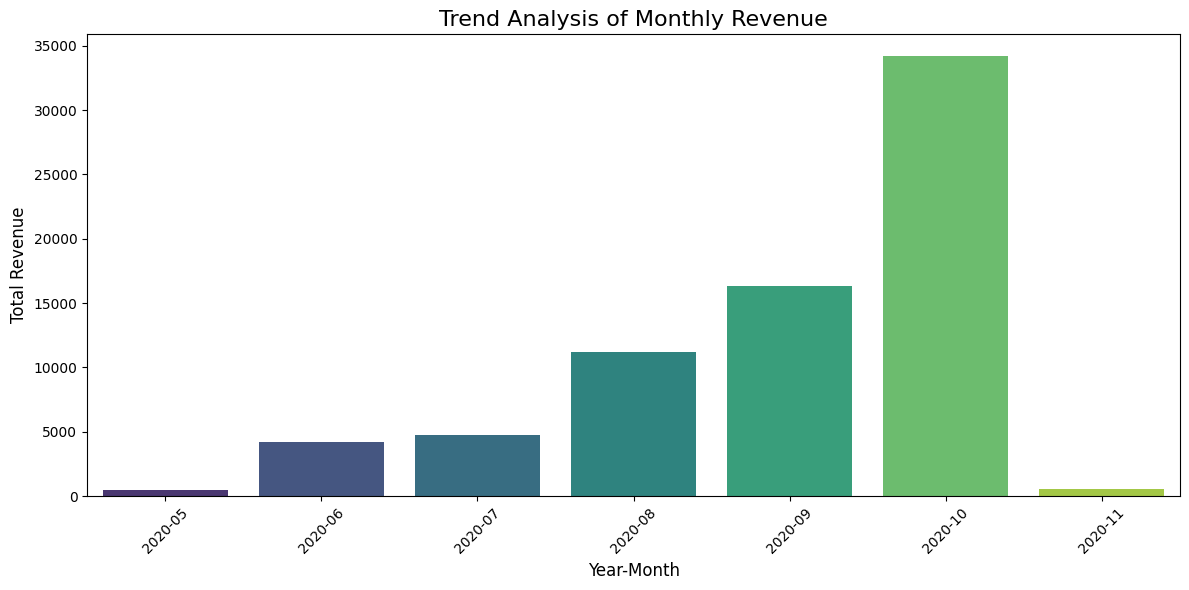

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura
sns.barplot(data=monthly_revenue, x='year_month', y='total_revenue', palette='viridis')


plt.title('Trend Analysis of Monthly Revenue', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visibilidade
plt.tight_layout()

plt.show()

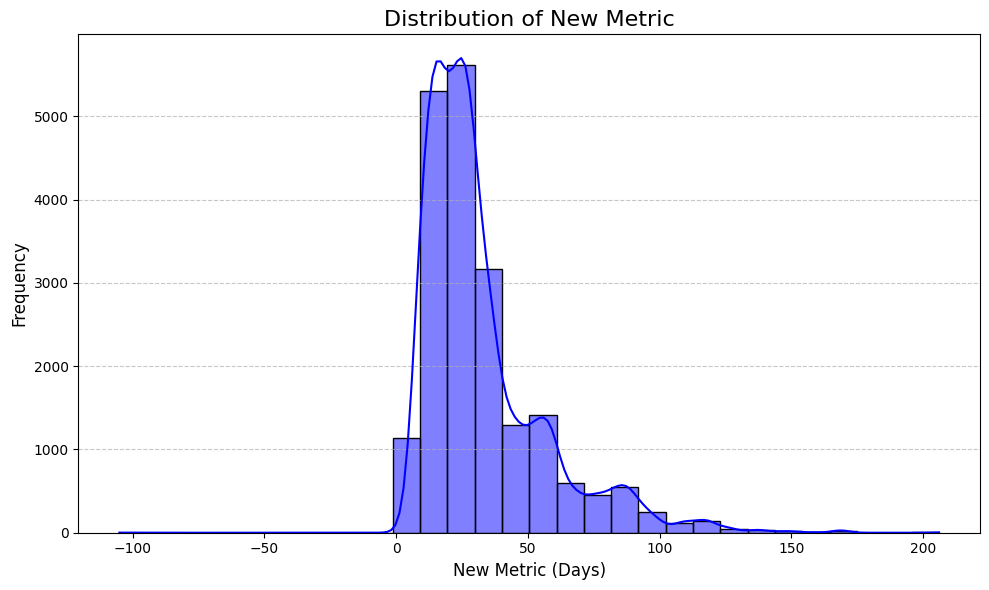

In [213]:
subset_merged_df_approach2['new_metric'] = (
    subset_merged_df_approach2['reimbursement_date'] - subset_merged_df_approach2['created_at_x']
).dt.days

subset_merged_df_approach2['new_metric']

import matplotlib.pyplot as plt
import seaborn as sns

# Histograma da nova métrica
plt.figure(figsize=(10, 6))
sns.histplot(data=subset_merged_df_approach2, x='new_metric', kde=True, color='blue', bins=30)

# Configurações estéticas
plt.title('Distribution of New Metric', fontsize=16)
plt.xlabel('New Metric (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()


C:\Users\meite\AppData\Local\Temp\ipykernel_12752\803856511.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_merged_df_approach2, x='new_metric', palette='viridis')


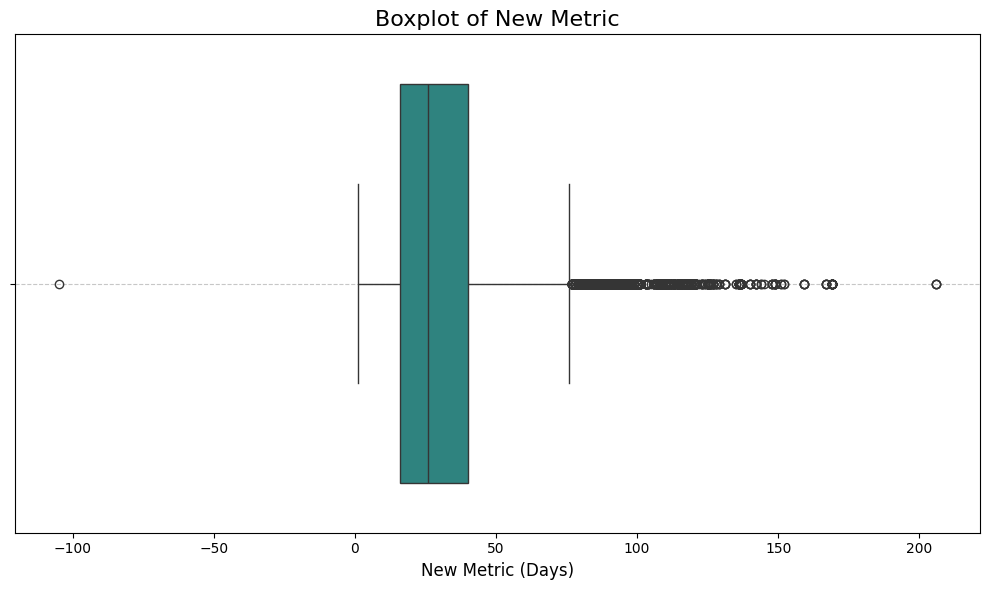

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o boxplot com a paleta viridis
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_merged_df_approach2, x='new_metric', palette='viridis')

# Configurações estéticas
plt.title('Boxplot of New Metric', fontsize=16)
plt.xlabel('New Metric (Days)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()



Valores de 'time_to_reimbursement' após o cálculo:


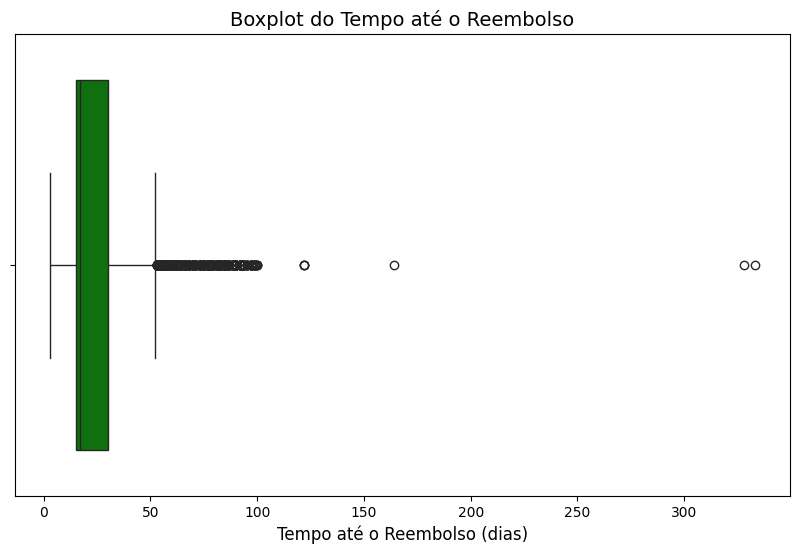

In [ ]:
# Remover linhas com valores nulos nas colunas 'created_at_x' e 'reimbursement_date'
merged_df2_clean = merged_df2.dropna(subset=['created_at_x', 'reimbursement_date'])
merged_df2_clean

(merged_df2_clean['reimbursement_date'] - merged_df2_clean['created_at_x']).dt.days

print("Valores de 'time_to_reimbursement' após o cálculo:")
merged_df2_clean['time_to_reimbursement'].head(20)


plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df2_clean['time_to_reimbursement'], color='green')
plt.title('Boxplot do Tempo até o Reembolso', fontsize=14)
plt.xlabel('Tempo até o Reembolso (dias)', fontsize=12)
plt.show()



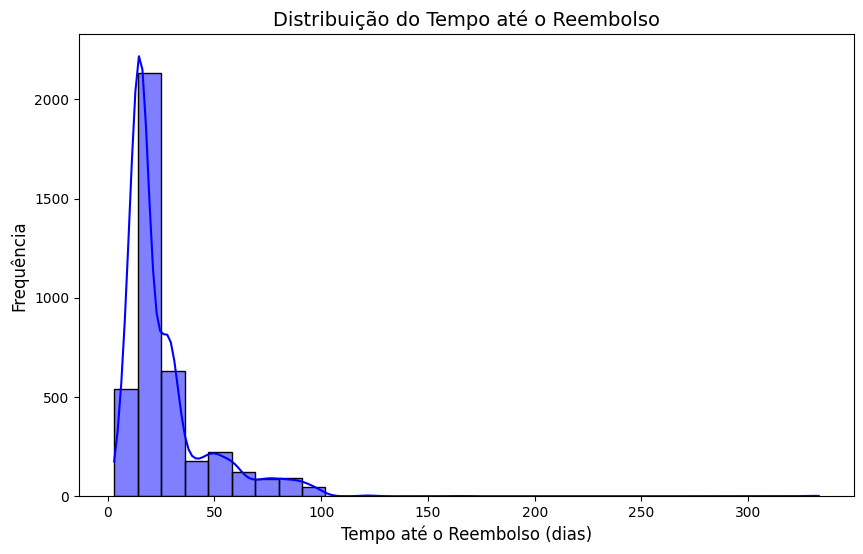

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(merged_df2_clean['time_to_reimbursement'], kde=True, color='blue', bins=30)
plt.title('Distribuion of the time until  reimbursement', fontsize=14)
plt.xlabel('Tempo até o Reembolso (dias)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()


In [ ]:
"""# Plotando o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_reimbursement_time.index, y=monthly_avg_reimbursement_time.values, marker='o', color='red')
plt.title('Tempo Médio até o Reembolso por Mês', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Tempo Médio até o Reembolso (dias)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()"""


"# Plotando o gráfico de linha\nplt.figure(figsize=(10, 6))\nsns.lineplot(x=monthly_avg_reimbursement_time.index, y=monthly_avg_reimbursement_time.values, marker='o', color='red')\nplt.title('Tempo Médio até o Reembolso por Mês', fontsize=14)\nplt.xlabel('Mês', fontsize=12)\nplt.ylabel('Tempo Médio até o Reembolso (dias)', fontsize=12)\nplt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])\nplt.show()"

In [ ]:


"""Histogram and boxplot are good for exploring the distribution and identifying outliers.
The line plot is useful for analyzing the trend over time, such as the evolution of the time to reimbursement by month.
The scatter plot helps to investigate the relationship between the creation date and the time to reimbursement."""

'Histogram and boxplot are good for exploring the distribution and identifying outliers.\nThe line plot is useful for analyzing the trend over time, such as the evolution of the time to reimbursement by month.\nThe scatter plot helps to investigate the relationship between the creation date and the time to reimbursement.'

In [ ]:
"""import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'merged_df2_clean' has columns 'created_at_x' and 'time_to_reimbursement'
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.scatterplot(x=merged_df2_clean['created_at_x'], y=merged_df2_clean['time_to_reimbursement'], 
                color='blue', s=80, edgecolor='black', alpha=0.6, label='Time to Reimbursement')

# Optionally, add a regression line
sns.regplot(x=merged_df2_clean['created_at_x'].map(lambda x: x.timestamp()), 
            y=merged_df2_clean['time_to_reimbursement'], scatter=False, color='red', line_kws={"color": "red", "lw": 2})

plt.title('Scatter Plot of Time to Reimbursement vs Creation Date', fontsize=14)
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('Time to Reimbursement (days)', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.legend()
plt.show()"""


'import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Assuming \'merged_df2_clean\' has columns \'created_at_x\' and \'time_to_reimbursement\'\nplt.figure(figsize=(10, 6))\n\n# Scatter plot with regression line\nsns.scatterplot(x=merged_df2_clean[\'created_at_x\'], y=merged_df2_clean[\'time_to_reimbursement\'], \n                color=\'blue\', s=80, edgecolor=\'black\', alpha=0.6, label=\'Time to Reimbursement\')\n\n# Optionally, add a regression line\nsns.regplot(x=merged_df2_clean[\'created_at_x\'].map(lambda x: x.timestamp()), \n            y=merged_df2_clean[\'time_to_reimbursement\'], scatter=False, color=\'red\', line_kws={"color": "red", "lw": 2})\n\nplt.title(\'Scatter Plot of Time to Reimbursement vs Creation Date\', fontsize=14)\nplt.xlabel(\'Creation Date\', fontsize=12)\nplt.ylabel(\'Time to Reimbursement (days)\', fontsize=12)\n\n# Rotate x-axis labels if needed\nplt.xticks(rotation=45)\n\n# Show the plot\nplt.tight_layout()\nplt.legend()\nplt.show()'

In [ ]:
merged_df

,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32089,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,...,accepted,NaN,5.0,Instant Payment Cash Request 22357,2020-10-20 07:58:19.637461+00,2020-10-20 07:58:19.637491+00,2021-02-05 12:19:30.685779+00,NaN,NaN,after
32090,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,...,accepted,NaN,5.0,Postpone Cash Request 20256,2020-10-30 17:08:16.906449+00,2020-10-30 17:08:21.967966+00,2020-10-30 17:08:21.416796+00,2020-11-06 11:00:00+00,2020-12-07 11:00:00+00,before
32091,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,...,accepted,NaN,5.0,Instant Payment Cash Request 20256,2020-10-10 05:42:11.679401+00,2020-10-13 14:25:03.460352+00,2021-02-05 13:14:19.731397+00,NaN,NaN,after
32092,19886,100.0,direct_debit_sent,2020-10-08 14:16:52.155661+00,2021-01-05 15:45:52.645536+00,44867.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-10,...,accepted,NaN,5.0,Postpone Cash Request 19886,2020-10-10 21:22:00.083739+00,2020-10-13 14:25:18.501716+00,2020-10-10 21:22:04.456828+00,2020-11-06 22:00:00+00,2020-12-06 11:00:00+00,before
